# 1. Importing the libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

#Scalable Vector Graphics (SVG) is a web-friendly vector file format. vector files store images
#via mathematical formulas based on points and lines on a grid
pio.renderers.default= 'svg'

# 2. Importing the dataset

In [66]:
raw_df = pd.read_csv("Zomato_Chennai_Listing_2020.csv")

In [67]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


# 3. Getting Basic Information about the Dataset

In [68]:
raw_df.shape

(12032, 12)

In [69]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [70]:
raw_df.describe()
# The top is the most common value. The freq is the most common value’s frequency.

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


# 4. Cleaning the Dataset

## a. Removing the redundunt rows of data

In [71]:
raw_df[raw_df.duplicated()]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [72]:
# check if it has any null values

raw_df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

## b. Replace the null values with zero in Dining Rating, Dining Rating Count, Delivery Rating and Delivery Rating Count

In [73]:
raw_df.fillna(value=0, inplace=True)

In [74]:
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

## c. Converting the DataTypes of numerical columns to numeric

In [75]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['Dining Rating'].value_counts()

Dining Rating
0.0    5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [76]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: count, Length: 794, dtype: int64

In [77]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['Delivery Rating'].value_counts()

Delivery Rating
0.0    5851
3.9    1383
3.8     701
4.0     570
3.7     559
4.1     468
3.6     465
4.2     401
3.5     314
4.3     277
3.4     259
3.3     189
4.4     128
3.2      93
3.1      79
3.0      63
4.5      55
2.9      39
2.8      26
4.6      24
2.7      19
2.6      17
2.5       9
0.3       8
2.4       7
2.3       5
2.2       5
2.0       5
1.8       5
4.7       4
2.1       2
1.6       1
1.5       1
Name: count, dtype: int64

In [78]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
0                               220
27                               34
37                               30
                               ... 
3530                              1
7705                              1
6374                              1
1773                              1
1617                              1
Name: count, Length: 2282, dtype: int64

In [79]:
raw_df.replace(to_replace = ['None','Invalid','Does not offer Delivery','Does not offer Dining',
                         'Not enough Delivery Reviews','Not enough Dining Reviews'], value =0,inplace=True)

In [80]:
raw_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"


In [81]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  float64
 8   Dining Rating Count    12032 non-null  object 
 9   Delivery Rating        12032 non-null  float64
 10  Delivery Rating Count  12032 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [82]:
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype("int32")
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].astype("int32")

In [83]:
raw_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"


In [84]:
def get_specific_location(x):
    if len(x.split(',')) >=2:
        return x.split(',')[-1].replace(' ','')
    else:
        return x

raw_df['Location'] = raw_df['Location'].apply(lambda x: get_specific_location(x))

In [85]:
zomato_df = raw_df.copy()

In [86]:
zomato_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],0,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"


# 5. Performing Exploratory Data Analysis

## Q1) How many restaurants are in Chennai for each location?

In [87]:
zomato_df.groupby(by='Location').agg({'Name of Restaurant': 'count'}).reset_index()

,Location,Name of Restaurant
0,ARadhaHotel,3
1,Abhiramapuram,7
2,Adambakkam,117
3,Adyar,201
4,Akkarai,16
...,...,...
134,Vepery,63
135,Vettuvankeni,10
136,Virugambakkam,76
137,Washermenpet,121


In [88]:
rest_df = zomato_df.groupby(by='Location').agg({'Name of Restaurant': 'count'}).rename(columns={'Location': 'Location',
                                                'Name of Restaurant': 'No of Restaurant'}).reset_index()
rest_df = rest_df.sort_values('No of Restaurant', ascending=False)
rest_df

,Location,No of Restaurant
92,Porur,421
133,Velachery,421
7,Ambattur,361
115,T. Nagar,315
90,Perungudi,288
...,...,...
110,Somerset Greenways,2
112,Sriperumbudur,2
96,RK Salai (Cathedral Road),2
26,East...,1


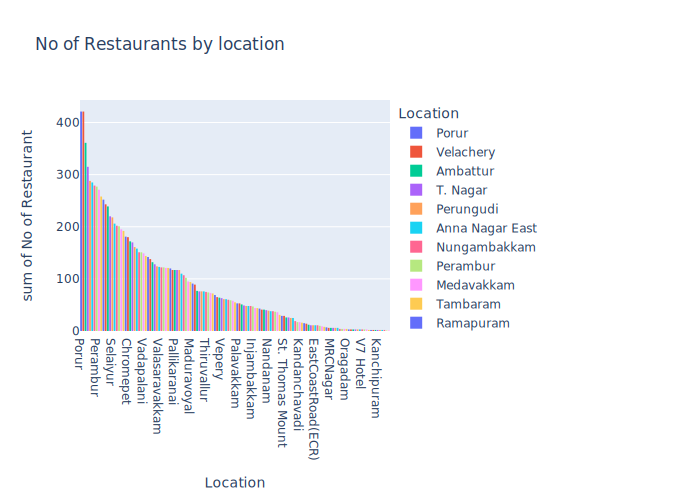

In [89]:
fig = px.histogram(rest_df, x='Location', y= 'No of Restaurant', color= 'Location',
                    title= 'No of Restaurants by location',
                    labels= {'LOCATION': 'Location'})
# if you face below ValueError: install keleido
#Image export using the "kaleido" engine requires the kaleido package,
#which can be installed using pip:
#    $ pip install -U kaleido
fig.show()

## Q2) What are the percentage of restaurants by Dining Rating Type in Chennai?

In [90]:
zomato_df['Dining Rating'].value_counts() # returns series object

Dining Rating
0.0    5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [91]:
zomato_df['Dining Rating'].value_counts().index

Index([0.0, 3.6, 3.5, 3.7, 3.4, 3.3, 3.8, 3.2, 3.9, 3.1, 2.0, 3.0, 4.0, 2.9,
       4.1, 2.8, 4.2, 2.7, 4.3, 2.6, 2.5, 4.4, 2.4, 4.5, 2.3, 2.2, 4.6, 4.7,
       2.1, 4.9, 4.8, 1.9, 1.7, 0.3, 1.0],
      dtype='float64', name='Dining Rating')

In [92]:
zomato_df['Dining Rating'].value_counts().reset_index() # reset_index() returns dataframe/ reset_index returns series

,Dining Rating,count
0,0.0,5351
1,3.6,584
2,3.5,553
3,3.7,525
4,3.4,500
5,3.3,463
6,3.8,460
7,3.2,433
8,3.9,379
9,3.1,363


In [93]:
rating_type_df = zomato_df['Dining Rating'].value_counts().reset_index()
rating_type_df.rename(columns={'Dining Rating':'Dining Rating', 'count':'No of Restaurants'}, inplace=True)
rating_type_df['PERCENTAGE(%)'] = (rating_type_df['No of Restaurants']/rating_type_df['No of Restaurants'].sum())*100
rating_type_df

,Dining Rating,No of Restaurants,PERCENTAGE(%)
0,0.0,5351,44.473072
1,3.6,584,4.853723
2,3.5,553,4.596077
3,3.7,525,4.363364
4,3.4,500,4.155585
5,3.3,463,3.848072
6,3.8,460,3.823138
7,3.2,433,3.598737
8,3.9,379,3.149934
9,3.1,363,3.016955


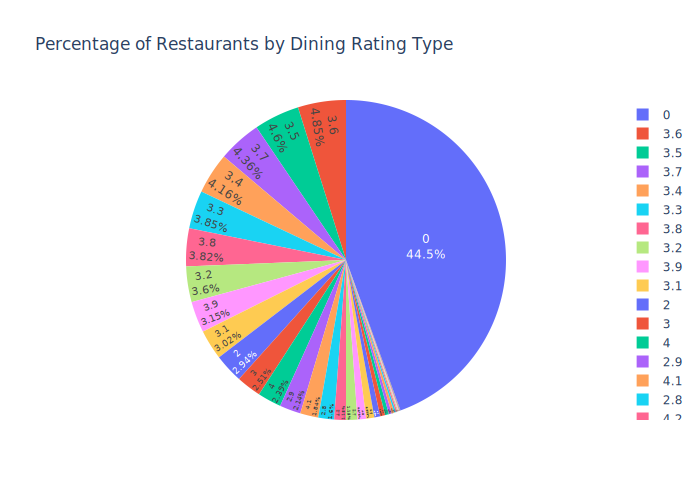

In [94]:
# How we can achive the same through Data Visualization
fig = px.pie(rating_type_df, names='Dining Rating', values='No of Restaurants', color='Dining Rating',
title='Percentage of Restaurants by Dining Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Q3) What are the percentage of restaurants by Delivery Rating Type in Chennai?

In [95]:
rating_type_df = zomato_df['Delivery Rating'].value_counts().reset_index()
rating_type_df.rename(columns={'Delivery Rating':'Delivery Rating', 'count':'No of Restaurants'}, inplace=True)
rating_type_df['PERCENTAGE(%)'] = (rating_type_df['No of Restaurants']/rating_type_df['No of Restaurants'].sum())*100
rating_type_df

,Delivery Rating,No of Restaurants,PERCENTAGE(%)
0,0.0,5851,48.628657
1,3.9,1383,11.494348
2,3.8,701,5.826130
3,4.0,570,4.737367
4,3.7,559,4.645944
5,4.1,468,3.889628
6,3.6,465,3.864694
7,4.2,401,3.332779
8,3.5,314,2.609707
9,4.3,277,2.302194


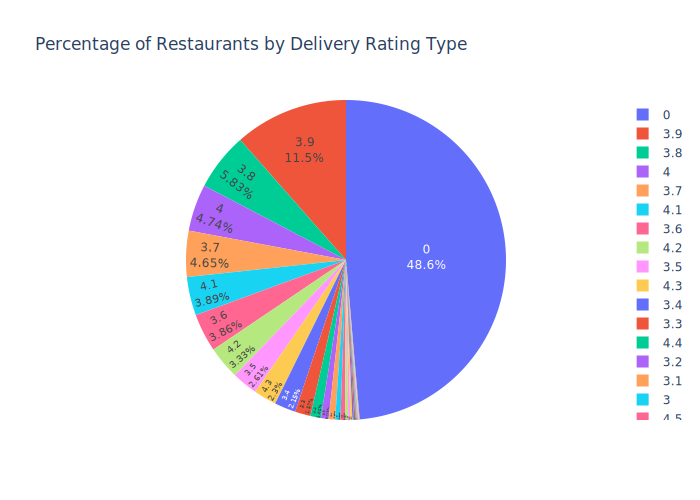

In [96]:
# How we can achive the same through Data Visualization
fig = px.pie(rating_type_df, names='Delivery Rating', values='No of Restaurants', color='Delivery Rating',
title='Percentage of Restaurants by Delivery Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Q3) Which are the Top 10 highest rated Seafood Restaurant in Chennai?

In [97]:
seafood_df = zomato_df[zomato_df['Cuisine'].str.contains('Seafood')]
seafood_df.sort_values(by='Dining Rating', ascending=False).head(10)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
195,https://www.zomato.com/chennai/the-marina-nung...,The Marina,"39, College Road, Nungambakkam, Chennai",Nungambakkam,"['Seafood', ' North Indian', ' Chinese']","['Sea Food', ' Jumbo Prawns', ' Biryani', ' Fi...",1600.0,4.8,1082,4.3,373,"['Home Delivery', 'Indoor Seating', 'Table res..."
292,https://www.zomato.com/chennai/alchemy-bar-lou...,Alchemy Bar & Lounge,"180, TTK Road, Alwarpet, Chennai",Alwarpet,"['Continental', ' Finger Food', ' Seafood', ' ...","['Cocktails', ' Fries', ' Brownie', ' Peri Per...",2000.0,4.5,432,0.0,0,"['Full Bar Available', 'Live Sports Screening'..."
214,https://www.zomato.com/chennai/sera-the-tapas-...,Sera - The Tapas Bar & Restaurant,"71, Cathedral Road, Gopalapuram, Chennai",Gopalapuram,"['Finger Food', ' Seafood', ' Italian', ' Cont...","['Cocktails', ' Pasta', ' Nachos', ' Mashed Po...",1600.0,4.5,964,3.4,50,"['Home Delivery', 'Full Bar Available', 'Free ..."
358,https://www.zomato.com/chennai/the-wharf-2-0-r...,The Wharf 2.0 - Radisson BLU Templebay,"Radisson BLU Templebay, 57, Covelong Road,, ...",Mamallapuram,"['Seafood', ' Mediterranean', ' Italian', ' No...","['Sea Food', ' Jumbo Prawns', ' Pasta', ' Fish...",3000.0,4.4,517,0.0,0,"['Wheelchair Accessible', 'Full Bar Available'..."
342,https://www.zomato.com/chennai/lattitude-49-ma...,L'attitude 49,"Grande Bay Resort, 123, East Raja Street, Kov...",Grande Bay Resort,"['Singaporean', ' Thai', ' Asian', ' Chinese',...","['Sea Food', ' Fish', ' Pasta', ' Noodle', ' B...",1800.0,4.4,563,0.0,0,"['Breakfast', 'Wheelchair Accessible', 'Full B..."
315,https://www.zomato.com/chennai/layalee-ekkadut...,Layalee,"12A, Near Jaya TV Signal, Jawaharlal Nehru Ro...",Ekkaduthangal,"['Arabian', ' BBQ', ' Seafood', ' Chinese', ' ...","['Fish', ' Faluda', ' Shawarma', ' Brownie', '...",700.0,4.4,586,4.1,143,"['Home Delivery', 'Table booking recommended',..."
282,https://www.zomato.com/chennai/bay-view-taj-fi...,Bay View - Taj Fisherman's Cove Resort & Spa,"Vivanta by Taj Fisherman's Cove, Covelong Be...",KanchipuramDistrict,"['Seafood', ' South Indian', ' Andhra', ' Kera...","['Sea Food', ' Fish Curry', ' Chips', ' Cockta...",3500.0,4.4,678,0.0,0,"['Wheelchair Accessible', 'Full Bar Available'..."
96,https://www.zomato.com/chennai/urban-spatula-a...,Urban Spatula,"Plot 1633, 54, H-Block, Ground Floor, 13th Ma...",Anna Nagar West,"['Continental', ' Seafood', ' Biryani', ' Ital...","['Burgers', ' Pasta', ' Fish', ' Fries', ' Chi...",800.0,4.4,794,4.3,911,"['Home Delivery', 'Free Parking', 'Table booki..."
9028,https://www.zomato.com/chennai/copper-kitchen-...,Copper Kitchen,"1, 100 Feet Bypass Road, Velachery, Chennai",Velachery,"['North Indian', ' Chinese', ' Chettinad', ' S...","['Biryani', ' Faluda', ' Tandoori Chicken', ' ...",1000.0,4.3,814,3.6,4673,"['Home Delivery', 'Lunch Menu', 'Valet Parking..."
9027,https://www.zomato.com/chennai/copper-kitchen-...,Copper Kitchen,"19B,Gandhi Mandapam Road, Opposite Anna Cente...",Kotturpuram,"['North Indian', ' Chinese', ' Chettinad', ' S...","['Brownie', ' Faluda', ' Biryani', ' Bbq Chick...",1000.0,4.3,1739,3.7,8659,"['Home Delivery', 'Indoor Seating', 'Table boo..."


## Q4) Which is the highest rating food in each restuarents in Chennai?

In [98]:
top_rating = zomato_df[zomato_df['Dining Rating'] >= 4.5]
top_rating.head(1)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
15,https://www.zomato.com/chennai/welcome-hotel-p...,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam...",Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300.0,4.5,1094,0.0,0,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."


## Q5) Which places have the highest Delivery rated restaurant for each Cuisine Type in Chennai?

In [99]:
# Assuming restaurants having rating above 4.5
high_rated_df = zomato_df[zomato_df["Delivery Rating"] >= 4.5]
high_rated_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
62,https://www.zomato.com/chennai/amadora-gourmet...,Amadora Gourmet Ice Cream & Sorbet,"23, Wallace Garden, 3rd Street, Nungambakkam,...",Nungambakkam,"['Desserts', ' Ice Cream']","['Sandwich', ' Gelato', ' Chocolate Icecreams'...",500.0,4.8,1516,4.5,361,"['Home Delivery', 'Outdoor Seating', 'Desserts..."
78,https://www.zomato.com/chennai/shri-rajasthani...,Shri Rajasthani Dhaba,"C 40, 3rd Floor, 2nd Avenue, Opposite KFC, An...",Anna Nagar West,"['Rajasthani', ' North Indian']","['Rajasthani Thali', ' Buttermilk', ' Roti', '...",500.0,4.5,983,4.5,5537,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
92,https://www.zomato.com/chennai/fruit-shop-on-g...,Fruit Shop On Greams Road,"11, Greams Road, Thousand Lights, Chennai",Thousand Lights,"['Beverages', ' Fast Food', ' Healthy Food', '...","['Fruit Juices', ' Sandwich', ' Mint Lime Cool...",350.0,4.5,609,4.6,1699,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
163,https://www.zomato.com/chennai/momo-sa-khang-b...,Momo Sa-Khang by Kailash Kitchen,"2/247, Perinbavilas Complex, Opposite Chitra ...",Choolaimedu,"['Momos', ' Chinese']","['Momos', ' Noodle', ' Chowmein', ' Fried Momo...",350.0,4.8,1658,4.5,2825,"['Home Delivery', 'Free Parking', 'Indoor Seat..."
164,https://www.zomato.com/chennai/la-chocolate-eg...,La Chocolate,"5, Casa Major Road, Opposite Corporation Bank...",Egmore,"['Bakery', ' Desserts', ' Italian', ' Continen...","['Brownie', ' Red Velvet', ' Photo Cake', ' Ch...",800.0,4.0,256,4.5,1574,"['Home Delivery', 'Vegetarian Only', 'Free Par..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11043,https://www.zomato.com/chennai/kulfi-treat-t-n...,Kulfi Treat,"4, Kuppu Arcade, Venkat Narayana Road, T. Nag...",T. Nagar,"['Desserts', ' Ice Cream', ' Beverages']",0,100.0,3.8,54,4.5,316,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
11179,https://www.zomato.com/chennai/chennai-kulfi-k...,Chennai Kulfi,"30, Ganapathy Rao Nagar, Kolathur, Chennai",Kolathur,"['Ice Cream', ' Desserts']",0,150.0,2.8,20,4.5,177,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
11377,https://www.zomato.com/chennai/nic-natural-ice...,NIC - Natural Ice Creams,Delivery Only,Mylapore,['Ice Cream'],0,150.0,0.0,0,4.5,145,"['Delivery Only', 'Desserts and Bakes']"
11379,https://www.zomato.com/chennai/nic-natural-ice...,NIC - Natural Ice Creams,"House 3, Kundrathur Main Road, M S Nagar, Por...",Porur,['Ice Cream'],0,150.0,0.0,0,4.6,102,"['Delivery Only', 'Desserts and Bakes']"


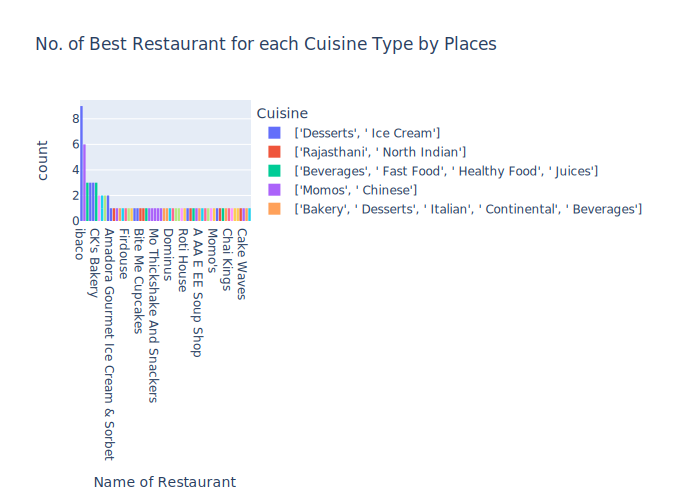

In [100]:
fig = px.histogram(high_rated_df, x='Name of Restaurant', color='Cuisine',
                  title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()

## Q6) What is the Avg Delivery rating Count Distibution of highest rated restaurant for each Cuisine Type in Chennai?

In [101]:
highest_rated_price_df = high_rated_df.groupby(by=['Location', 'Cuisine'])['Delivery Rating Count'].mean().reset_index()
highest_rated_price_df

,Location,Cuisine,Delivery Rating Count
0,Adambakkam,"['Arabian', ' Biryani']",491.0
1,Adambakkam,['Ice Cream'],136.0
2,Adyar,"['Bakery', ' Fast Food', ' Sandwich', ' Desser...",531.0
3,Adyar,"['Pizza', ' Fast Food']",4536.0
4,Alwarpet,"['Bakery', ' Coffee']",145.0
...,...,...,...
75,Vadapalani,['Beverages'],590.0
76,Vadapalani,"['Desserts', ' Beverages', ' Fast Food']",1213.0
77,Vadapalani,"['Mithai', ' North Indian', ' South Indian']",600.0
78,Velachery,"['Desserts', ' Beverages']",341.0


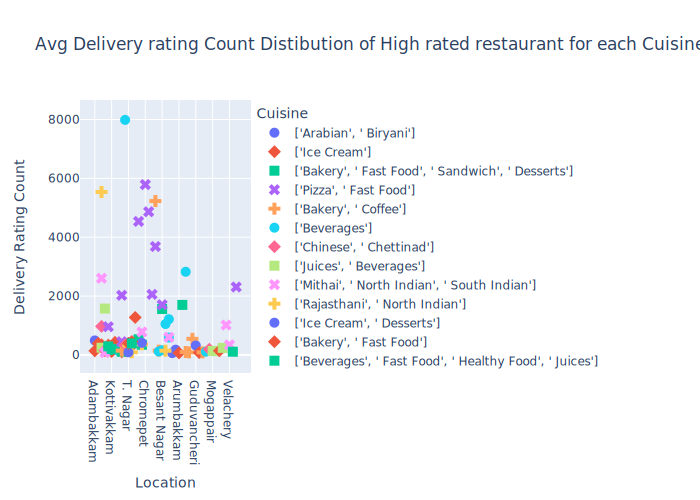

In [102]:
fig = px.scatter(highest_rated_price_df, x='Location', y='Delivery Rating Count', color='Cuisine', symbol='Cuisine',
                title=' Avg Delivery rating Count Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

## Q7) Which areas have a large number of Chinese Restaurant Market?

In [103]:
chinese_df = zomato_df[zomato_df["Cuisine"].str.contains("Chinese")]
chinese_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
5,https://www.zomato.com/chennai/dine-n-fun-meda...,Dine N Fun,"Opposite Forest Office, Tambaram Main Road, S...",Medavakkam,"['South Indian', ' North Indian', ' Chinese']","['Chicken Grill', ' Shawarma', ' Naan', ' Chic...",450.0,4.1,567,3.8,24700,"['Home Delivery', 'Indoor Seating']"
8,https://www.zomato.com/chennai/savoury-sea-she...,Savoury Sea Shell,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar East,"['Arabian', ' Chinese', ' North Indian', ' Leb...","['Shawarma', ' Chicken Grill', ' Brownie', ' S...",1400.0,4.2,2564,4.1,21700,"['Home Delivery', 'Indoor Seating', 'Card Upon..."
9,https://www.zomato.com/chennai/sangeetha-veg-r...,Sangeetha Veg Restaurant,"102/82, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"['South Indian', ' North Indian', ' Chinese', ...","['Filtered Coffee', ' Chaat', ' Faluda', ' Mas...",800.0,4.4,1578,4.2,39600,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
...,...,...,...,...,...,...,...,...,...,...,...,...
12014,https://www.zomato.com/chennai/bowl-bazaar-adyar,Bowl Bazaar,Delivery Only,Adyar,"['North Indian', ' South Indian', ' Chinese', ...",0,500.0,0.0,0,0.0,0,['Delivery Only']
12015,https://www.zomato.com/chennai/bowl-bazaar-med...,Bowl Bazaar,Delivery Only,Medavakkam,"['North Indian', ' South Indian', ' Chinese', ...",0,500.0,0.0,0,0.0,0,['Delivery Only']
12016,https://www.zomato.com/chennai/bowl-bazaar-1-p...,Bowl Bazaar,Delivery Only,Perungudi,"['North Indian', ' South Indian', ' Chinese']",0,400.0,0.0,0,0.0,0,['Delivery Only']
12017,https://www.zomato.com/chennai/bowl-bazaar-1-m...,Bowl Bazaar,Delivery Only,Medavakkam,"['North Indian', ' South Indian', ' Chinese']",0,400.0,0.0,0,0.0,0,['Delivery Only']


In [104]:
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant' : 'count', 'Price for 2' : 'mean'}).rename(columns= {'Name of Restaurant' : 'COUNT OF RESTAURANTS'}).reset_index()
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest_df.head()

,Location,COUNT OF RESTAURANTS,Price for 2
82,Porur,132,415.530303
5,Ambattur,121,379.338843
120,Velachery,106,508.490566
79,Perambur,99,413.636364
80,Perungudi,93,445.698925


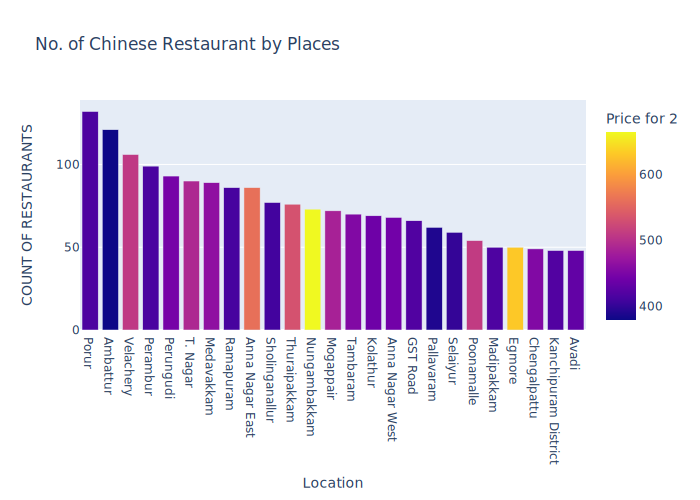

In [105]:
fig =px.bar(chinese_rest_df, x='Location', y= 'COUNT OF RESTAURANTS', color= 'Price for 2', 
           title = 'No. of Chinese Restaurant by Places')
fig.show()

## Q8) Is there a relation between Price and Delivery Rating by each Cuisine Type?

In [106]:
price_rating_df = zomato_df.groupby(['Cuisine', 'Delivery Rating'])['Price for 2'].mean().reset_index()
price_rating_df

,Cuisine,Delivery Rating,Price for 2
0,"['American', ' Andhra', ' Asian', ' Beverages'...",0.0,800.0
1,"['American', ' Arabian', ' Italian', ' Mexican...",0.0,150.0
2,"['American', ' BBQ']",0.0,400.0
3,"['American', ' Continental', ' European', ' It...",3.9,700.0
4,"['American', ' Continental', ' Italian', ' Nor...",3.8,800.0
...,...,...,...
4669,"['Tibetan', ' Momos']",4.3,400.0
4670,['Tibetan'],0.0,200.0
4671,"['Turkish', ' Kebab']",3.7,500.0
4672,"['Wraps', ' Fast Food']",0.0,300.0


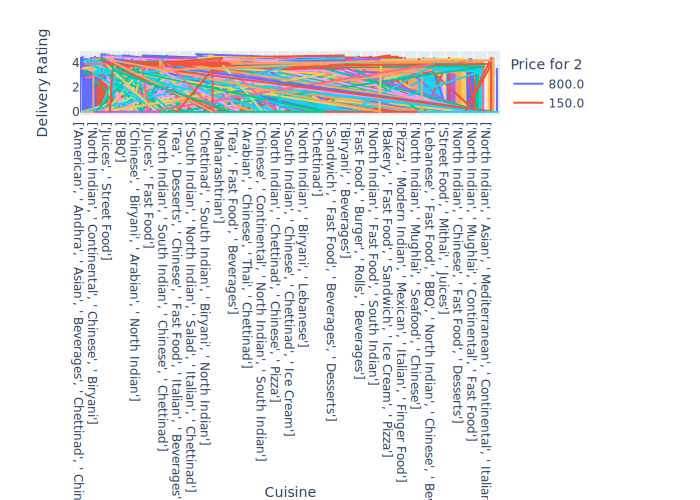

In [107]:
fig = px.line(price_rating_df, x="Cuisine", y="Delivery Rating", color= "Price for 2")
fig.show()

## Q9) Is there a relation between Region and Price?

In [108]:
region_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

,Location,Price for 2
0,ARadhaHotel,1900.000000
1,Abhiramapuram,228.571429
2,Adambakkam,291.025641
3,Adyar,443.830846
4,Akkarai,668.750000
...,...,...
134,Vepery,280.952381
135,Vettuvankeni,540.000000
136,Virugambakkam,355.263158
137,Washermenpet,291.735537


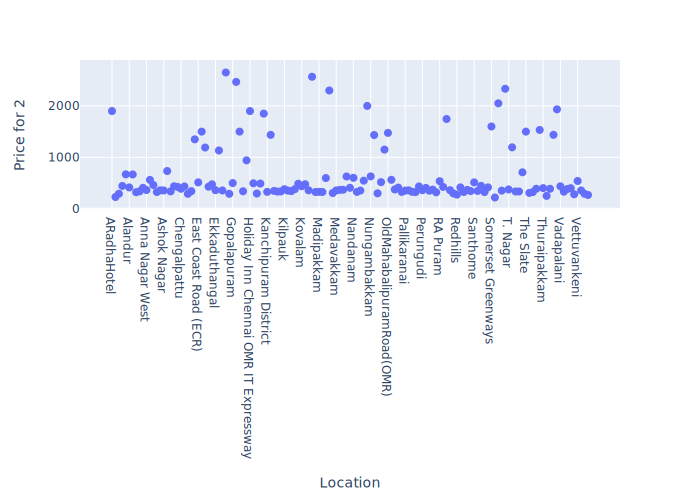

In [109]:
fig = px.scatter(region_price_df, x= "Location", y= "Price for 2").update_traces(marker_size=8)
fig.show()

## Q10) Find the list of Affordable Restaurants?

### The criteria for Affordable Restaurants would be:-
1) Low Price
2) High Rated
### First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
### Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
### restaurants that are 1/4th of 6000.

In [110]:
max_price = zomato_df["Price for 2"].max()
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [111]:
zomato_df.columns

Index(['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine',
       'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count',
       'Delivery Rating', 'Delivery Rating Count', 'Features'],
      dtype='object')

In [112]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price 
# i.e Finding Cheap Restaurant
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Features']]
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 1250]
aff_rest_df.sort_values(by='Price for 2', inplace=True)
aff_rest_df

,Name of Restaurant,Price for 2,Cuisine,Location,Features
4685,Soda Hub,40.0,['Beverages'],Navallur,"['Takeaway Only', 'Vegetarian Only', 'Desserts..."
6854,Planet Soda,50.0,"['Beverages', ' Juices']",Kandanchavadi,"['Desserts and Bakes', 'Outdoor Seating']"
7405,Indian Coffee House,50.0,"['Beverages', ' Juices']",Vepery,['Takeaway Only']
8355,Kaafemaa,50.0,['Beverages'],Ambattur,['Indoor Seating']
1448,Mamee Soup,60.0,['Healthy Food'],West Mambalam,"['Vegetarian Only', 'Indoor Seating']"
...,...,...,...,...,...
6746,Biryani Centre,1200.0,['Biryani'],Triplicane,"['Home Delivery', 'Indoor Seating']"
165,Copper Chimney,1200.0,"['North Indian', ' Arabian', ' Biryani', ' Mug...",Gopalapuram,"['Home Delivery', 'Indoor Seating', 'Table res..."
316,Prive Restaurant,1200.0,"['North Indian', ' Continental', ' Mexican', '...",Mylapore,"['Home Delivery', 'Vegetarian Only', 'Free Par..."
3697,Zhouyu,1200.0,['Asian'],Alwarpet,"['Home Delivery', 'Indoor Seating']"


In [113]:
# Finding the highest rated list of restaurants
highrate_rest_delivery_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Features','Delivery Rating']]
highrate_rest_delivery_df = highrate_rest_delivery_df[highrate_rest_delivery_df['Delivery Rating'] >= 4.5 ]
highrate_rest_delivery_df.sort_values(by='Delivery Rating', inplace=True)
highrate_rest_delivery_df

,Name of Restaurant,Price for 2,Cuisine,Location,Features,Delivery Rating
62,Amadora Gourmet Ice Cream & Sorbet,500.0,"['Desserts', ' Ice Cream']",Nungambakkam,"['Home Delivery', 'Outdoor Seating', 'Desserts...",4.5
8916,Nithya Amirtham Sweets,200.0,"['Mithai', ' Street Food', ' South Indian']",Kilpauk,"['Home Delivery', 'Vegetarian Only', 'Pre-Orde...",4.5
8961,Domino's Pizza,400.0,"['Pizza', ' Fast Food']",Chromepet,"['Home Delivery', 'Catering Available', 'Indoo...",4.5
8965,Domino's Pizza,400.0,"['Pizza', ' Fast Food']",Adyar,"['Home Delivery', 'Indoor Seating', 'Free Park...",4.5
8975,Domino's Pizza,400.0,"['Pizza', ' Fast Food']",Perungudi,"['Home Delivery', 'Catering Available', 'Free ...",4.5
...,...,...,...,...,...,...
11767,Green Crush,200.0,['Beverages'],Alwarpet,"['Home Delivery', 'Vegetarian Only']",4.6
9977,ibaco,200.0,['Ice Cream'],Mylapore,"['Home Delivery', 'Vegetarian Only', 'Desserts...",4.7
1985,Arabian Plate,300.0,"['Arabian', ' Biryani']",Adambakkam,"['Home Delivery', 'Indoor Seating']",4.7
3301,Mo Thickshake And Snackers,300.0,['Beverages'],Vadapalani,['Home Delivery'],4.7


In [114]:
# Finding the highest rated list of restaurants
highrate_rest_dining_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Features','Dining Rating']]
highrate_rest_dining_df = highrate_rest_dining_df[highrate_rest_dining_df['Dining Rating'] >= 4.5 ]
highrate_rest_dining_df.sort_values(by='Dining Rating', inplace=True)
highrate_rest_dining_df

,Name of Restaurant,Price for 2,Cuisine,Location,Features,Dining Rating
15,Welcome Hotel,300.0,"['South Indian', ' Desserts', ' Beverages']",Purasavakkam,"['Breakfast', 'Vegetarian Only', 'Indoor Seati...",4.5
207,Va Pho - Asian Canteen,1400.0,"['Asian', ' Chinese', ' Beverages']",Gopalapuram,"['Home Delivery', 'Valet Parking Available', '...",4.5
209,Cream Stone,350.0,"['Desserts', ' Ice Cream']",Alwarpet,"['Home Delivery', 'Vegetarian Only', 'Sugar Fr...",4.5
214,Sera - The Tapas Bar & Restaurant,1600.0,"['Finger Food', ' Seafood', ' Italian', ' Cont...",Gopalapuram,"['Home Delivery', 'Full Bar Available', 'Free ...",4.5
242,Shyam's Bombay Halwa House,600.0,['North Indian'],T. Nagar,"['Home Delivery', 'Vegetarian Only', 'Indoor S...",4.5
...,...,...,...,...,...,...
57,Brownie Heaven,350.0,"['Bakery', ' Desserts', ' Beverages']",Royapettah,"['Home Delivery', 'Indoor Seating', 'Desserts ...",4.9
184,Gossip Fusion Bistro,1500.0,"['Italian', ' Continental', ' Burger', ' Sandw...",Kanathur,"['Breakfast', 'Home Delivery', 'Free Parking',...",4.9
320,Bombay Kulfi,200.0,['Ice Cream'],Adyar,"['Home Delivery', 'Free Parking', 'Outdoor Sea...",4.9
155,The Sandwich Shop,300.0,"['Sandwich', ' Fast Food', ' Beverages']",West Mambalam,"['Home Delivery', 'Vegetarian Only', 'Bulk Ord...",4.9


In [115]:
highrate_rest_df = pd.merge(highrate_rest_delivery_df, highrate_rest_dining_df, how='inner', on=['Name of Restaurant', 'Location'])

### Now, we'll merge the aff_rest_df with highrate_rest_df to obtain the intersection i.e the list of Affordable Restaurants

In [116]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant', 'Location'])

In [117]:
highrate_aff_df

,Name of Restaurant,Price for 2,Cuisine,Location,Features,Price for 2_x,Cuisine_x,Features_x,Delivery Rating,Price for 2_y,Cuisine_y,Features_y,Dining Rating
0,Momo Sa-Khang by Kailash Kitchen,350.0,"['Momos', ' Chinese']",Choolaimedu,"['Home Delivery', 'Free Parking', 'Indoor Seat...",350.0,"['Momos', ' Chinese']","['Home Delivery', 'Free Parking', 'Indoor Seat...",4.5,350.0,"['Momos', ' Chinese']","['Home Delivery', 'Free Parking', 'Indoor Seat...",4.8
1,Fruit Shop On Greams Road,350.0,"['Beverages', ' Fast Food', ' Healthy Food', '...",Thousand Lights,"['Home Delivery', 'Vegetarian Only', 'Indoor S...",350.0,"['Beverages', ' Fast Food', ' Healthy Food', '...","['Home Delivery', 'Vegetarian Only', 'Indoor S...",4.6,350.0,"['Beverages', ' Fast Food', ' Healthy Food', '...","['Home Delivery', 'Vegetarian Only', 'Indoor S...",4.5
2,Amadora Gourmet Ice Cream & Sorbet,500.0,"['Desserts', ' Ice Cream']",Nungambakkam,"['Home Delivery', 'Outdoor Seating', 'Desserts...",500.0,"['Desserts', ' Ice Cream']","['Home Delivery', 'Outdoor Seating', 'Desserts...",4.5,500.0,"['Desserts', ' Ice Cream']","['Home Delivery', 'Outdoor Seating', 'Desserts...",4.8
3,Shri Rajasthani Dhaba,500.0,"['Rajasthani', ' North Indian']",Anna Nagar West,"['Home Delivery', 'Vegetarian Only', 'Indoor S...",500.0,"['Rajasthani', ' North Indian']","['Home Delivery', 'Vegetarian Only', 'Indoor S...",4.5,500.0,"['Rajasthani', ' North Indian']","['Home Delivery', 'Vegetarian Only', 'Indoor S...",4.5


In [118]:
highrate_aff_df = highrate_aff_df[['Name of Restaurant','Price for 2_x', 'Cuisine_x', 'Features_x']]
highrate_aff_df.rename(columns={'Name of Restaurant': 'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine',
'Features_x':'Features'},inplace=True)

/var/folders/52/3smrrwzs1674_yymbpt0326h0000gn/T/ipykernel_5127/2403309656.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
highrate_aff_df

,Name of Restaurant,Price for 2,Cuisine,Features
0,Momo Sa-Khang by Kailash Kitchen,350.0,"['Momos', ' Chinese']","['Home Delivery', 'Free Parking', 'Indoor Seat..."
1,Fruit Shop On Greams Road,350.0,"['Beverages', ' Fast Food', ' Healthy Food', '...","['Home Delivery', 'Vegetarian Only', 'Indoor S..."
2,Amadora Gourmet Ice Cream & Sorbet,500.0,"['Desserts', ' Ice Cream']","['Home Delivery', 'Outdoor Seating', 'Desserts..."
3,Shri Rajasthani Dhaba,500.0,"['Rajasthani', ' North Indian']","['Home Delivery', 'Vegetarian Only', 'Indoor S..."


## Q10) Find the list of most Reliable Restaurants?
## The criteria for most Reliable Restaurants would be:-
1) Low Price
2) High Rated
3) Dining and Delivery rating should be > 4.5
4) Large No. of Dining and Delivery rating counts
## First step will be to find the restaurants with Votes greater than Mean of Votes

In [120]:
mean_dining_rating_count = zomato_df['Dining Rating Count'].mean()
mean_dining_rating_count

75.16165226063829

In [121]:
# Finding the highest rated list of restaurants
reliable_rest_dining_count_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Features','Dining Rating Count']]
reliable_rest_dining_count_df = reliable_rest_dining_count_df[reliable_rest_dining_count_df['Dining Rating Count'] >= 75 ]
reliable_rest_dining_count_df.sort_values(by='Dining Rating Count', inplace=True)
reliable_rest_dining_count_df

,Name of Restaurant,Price for 2,Cuisine,Location,Features,Dining Rating Count
2121,Green Onion Restaurant,650.0,"['North Indian', ' Chinese', ' Kebab', ' Bever...",Pallavaram,"['Home Delivery', 'Table Reservation Not Requi...",75
2110,Western Snacks,200.0,['Biryani'],Egmore,"['Home Delivery', 'Outdoor Seating']",75
1606,L'Orange,500.0,"['North Indian', ' Mughlai', ' Chinese']",Anna Nagar East,"['Home Delivery', 'Outdoor Seating', 'Indoor S...",75
10009,Juice Pump,300.0,"['Beverages', ' Juices', ' Fast Food', ' Momos']",Anna Nagar East,"['Home Delivery', 'Indoor Seating']",75
1695,Yaa Rahman Biriyani,250.0,['Biryani'],Saligramam,"['Home Delivery', 'Indoor Seating']",75
...,...,...,...,...,...,...
9026,Copper Kitchen,1000.0,"['North Indian', ' Chinese', ' Chettinad', ' S...",Porur,"['Home Delivery', 'Sports TV', 'Indoor Seating...",5073
9030,Paradise Biryani,800.0,"['Biryani', ' North Indian', ' Chinese']",Perungudi,"['Home Delivery', 'Indoor Seating']",5317
74,Onesta,600.0,"['Pizza', ' Italian', ' Fast Food', ' Beverage...",Semmancheri,"['Home Delivery', 'Indoor Seating', 'Buffet', ...",5407
9233,Barbeque Nation,1600.0,"['North Indian', ' Continental', ' Kebab', ' B...",T. Nagar,"['Home Delivery', 'Indoor Seating', 'Buffet', ...",5821


In [122]:
mean_delivery_rating_count = zomato_df['Delivery Rating Count'].mean()
mean_delivery_rating_count

713.4231216755319

In [123]:
# Finding list of restaurants that have Votes greater than and equal to Mean of delivery counts
reliable_rest_Delivery_count_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Features','Delivery Rating Count']]
reliable_rest_Delivery_count_df = reliable_rest_Delivery_count_df[reliable_rest_Delivery_count_df['Delivery Rating Count'] >= 713 ]
reliable_rest_Delivery_count_df.sort_values(by='Delivery Rating Count', inplace=True)
reliable_rest_Delivery_count_df

,Name of Restaurant,Price for 2,Cuisine,Location,Features,Delivery Rating Count
1241,Midnight Express,400.0,"['Chettinad', ' North Indian']",Alwarpet,"['Home Delivery', 'Indoor Seating']",713
3168,Madurai Nachiyar Mess,400.0,"['Chinese', ' North Indian', ' Chettinad', ' S...",St. Thomas Mount,"['Home Delivery', 'Indoor Seating']",713
2146,Om Snacks,150.0,"['Sandwich', ' Fast Food']",Kodambakkam,['Home Delivery'],714
1955,Marhaba Family Restaurant,500.0,"['North Indian', ' Biryani', ' Chinese', ' Rol...",Kotturpuram,"['Home Delivery', 'Indoor Seating']",715
903,Chidambaram New Moorthy Cafe,500.0,"['North Indian', ' Seafood', ' Chinese']",Anna Nagar West,"['Home Delivery', 'Indoor Seating']",715
...,...,...,...,...,...,...
8822,Sangeetha Veg Restaurant,500.0,"['South Indian', ' North Indian', ' Chinese']",Thuraipakkam,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",45500
232,Sapthagiri Tiffin Centre,150.0,"['South Indian', ' Chinese']",T. Nagar,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",47200
22,Supriya Andhra Restaurant,650.0,"['Biryani', ' North Indian', ' Chinese']",Thuraipakkam,"['Home Delivery', 'Free Parking', 'Indoor Seat...",50100
251,Hotelkaar Biriyani,350.0,"['South Indian', ' Biryani']",T. Nagar,"['Home Delivery', 'Indoor Seating']",51700


## These are the most reliable, highest rated and affordable restaurants:-
We obtain this dataframe by simply taking the intersection of highrate_aff_df & mean_rest_df
This dataframe obtained below shows the restaurants whose:
### Cost is below 1250
### Rating is above 4.5
### Delivery Rating counts are above 713 and Dinining rating counts are above 75

In [124]:
reliable_rest_ratings_count = pd.merge(reliable_rest_Delivery_count_df, reliable_rest_dining_count_df, how='inner', on=['Name of Restaurant', 'Location'])
reliable_rest_ratings_count = reliable_rest_ratings_count[['Name of Restaurant','Price for 2_x', 'Cuisine_x', 'Features_x']]
reliable_rest_ratings_count.rename(columns={'Name of Restaurant': 'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine',
'Features_x':'Features'},inplace=True)
                                                   

In [125]:
reliable_rest_ratings_count

,Name of Restaurant,Price for 2,Cuisine,Features
0,Midnight Express,400.0,"['Chettinad', ' North Indian']","['Home Delivery', 'Indoor Seating']"
1,Chidambaram New Moorthy Cafe,500.0,"['North Indian', ' Seafood', ' Chinese']","['Home Delivery', 'Indoor Seating']"
2,SS Hyderabad Biryani,500.0,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Home Delivery', 'Indoor Seating']"
3,SS Hyderabad Biryani,500.0,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Home Delivery', 'Indoor Seating']"
4,SS Hyderabad Biryani,500.0,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Home Delivery', 'Indoor Seating']"
...,...,...,...,...
1370,Sangeetha Veg Restaurant,500.0,"['South Indian', ' North Indian', ' Chinese']","['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
1371,Sapthagiri Tiffin Centre,150.0,"['South Indian', ' Chinese']","['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
1372,Supriya Andhra Restaurant,650.0,"['Biryani', ' North Indian', ' Chinese']","['Home Delivery', 'Free Parking', 'Indoor Seat..."
1373,Hotelkaar Biriyani,350.0,"['South Indian', ' Biryani']","['Home Delivery', 'Indoor Seating']"
